# Data Analysis Using Statistical Methods: Diabetes Prediction 
   ## Jaykumar Patel
   ## Department of Mathematical Sciences, Stevens Institute of Technology, Hoboken, NJ
   ## Project Supervisor: Dr. Hadi Safari Katesari

## Abstract 

With the aid of statistical analysis, which is a scientific instrument, enormous amounts of data may be gathered, analyzed, and turned into useful information by spotting common patterns and trends. The idea is to employ a dataset on which different statistical techniques can be applied in order to make precise predictions. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. 

# Introduction 

The goal of this project is to put into practice the statistical techniques that were discovered while analyzing actual data. F-test, Fisher information, ANOVA Analysis, Chi Squared Tests of Independence for Different Distributions, categorical data analysis, and regression models are only a few examples.

We will leverage the National Institute of Diabetes and Digestive and Kidney Diseases' diabetes dataset to accomplish this, specifically the fact that all of the patients are female and at least 21 years old. First, we'll use a variety of statistical techniques to track dependencies and correlations between the different data columns. After that, I will use the forward and backward elimination techniques to choose the data's top characteristics for a logistic regression model. On the basis of our test data, we will evaluate the precision of this logistic regression model.

# Data Description 

The dataset contains 769 observations and 9 attributes (8 predictors and 1 response). Below is a list of the variables with descriptions taken from Kaggle.
1. Pregnancies : Number of times pregnant
2. Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure : Diastolic blood pressure (mm Hg)
4. SkinThickness : Triceps skin fold thickness (mm) 
5. Insulin : 2-Hour serum insulin (mu U/ml)
6. BMI : Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction : Diabetes pedigree function
8. Age : Age (Years)
9. Outcome : To express the final result. 1 is Yes and 0 is No

In [591]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.feature_selection import SelectKBest, chi2, f_classif 
from scipy.stats import chi2, chi2_contingency
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
# from joblib import sys
# sys.modules['sklearn.externals.joblib'] = joblib
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings('ignore')
import pandas.testing as tm
from pingouin import multivariate_normality

In [592]:
import pandas as pd
df = pd.read_csv(r'D:\MA541_project\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [593]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


checking if there is any NaN values.

In [594]:
 df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see that in this dataset we do not have any NaN values but in the case we have NaN values then we have to change them with the mean, mode or median values.

In [595]:
df = df.dropna()
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

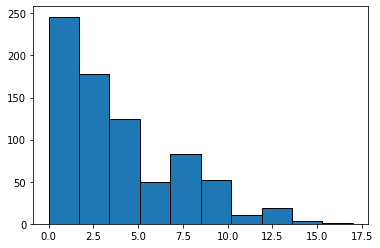

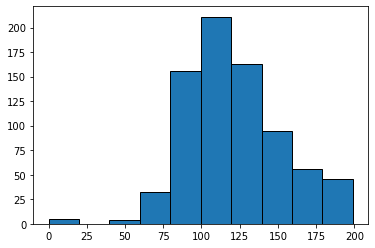

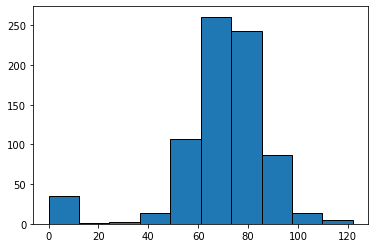

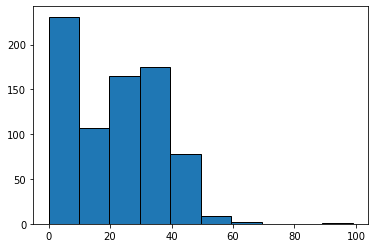

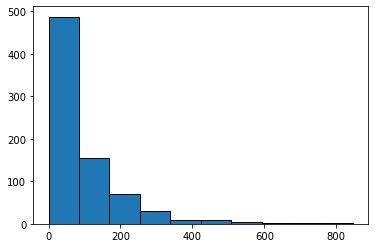

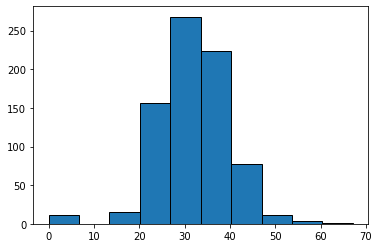

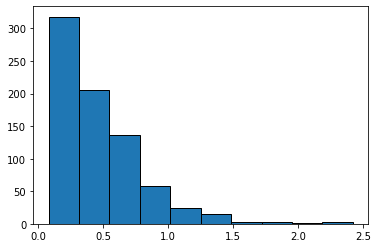

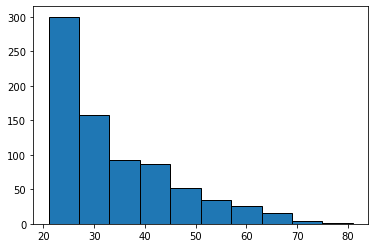

In [596]:
for i in range(len(df.columns) - 1):
    plt.hist(df[df.columns[i]], edgecolor='black')
    plt.show()

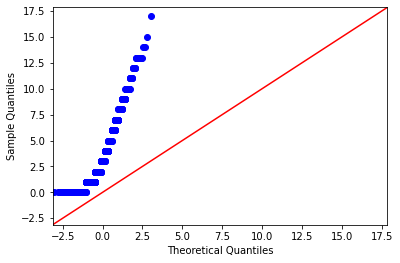

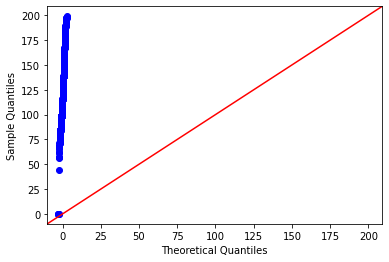

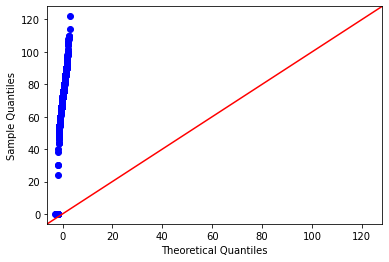

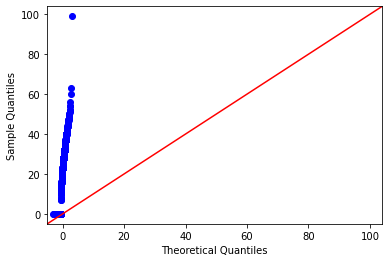

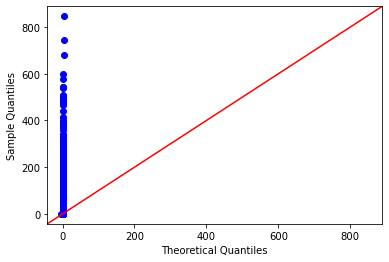

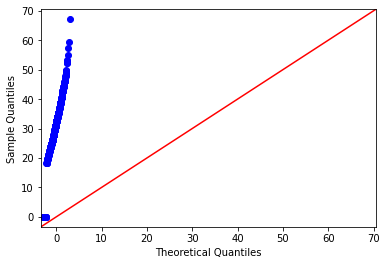

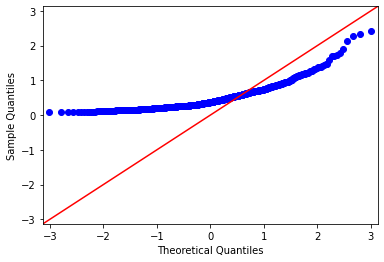

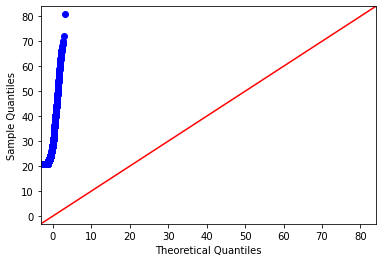

In [597]:
for i in range(len(df.columns) - 1):
    fig = sm.qqplot(df[df.columns[i]], line='45')
    plt.show()

## Correlation matrix and Heatmap

With the help of heatmap the user will be able to identify highly correlated variables and this will allow them to streamline the feature selection process. Understanding a dataset is very important when creating a model, and heatmaps are one of the many tools in a data scientists arsenal.

In [598]:

import os
import pandas as pd
import numpy as np
 
# Loading the dataset
#data = pd.read_csv(r'C:\Users\JAY PATEL\Downloads\crypto.csv')
numeric_col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
 
#Using Correlation analysis to depict the relationship between the numeric/continuous data variables
corr = df.loc[:,numeric_col].corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot:>

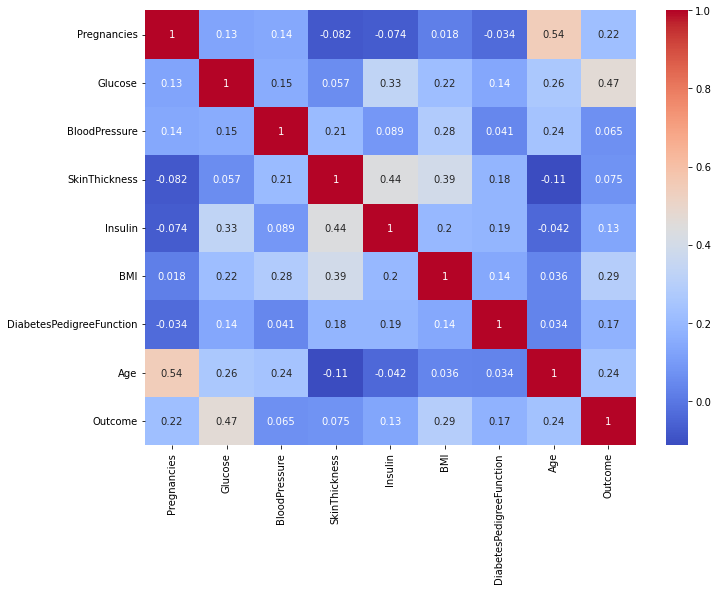

In [599]:
import seaborn as sns
plt.figure(figsize=(11,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True,  cmap='coolwarm')

FINDING CORRELATIONS GREATER THAN .9 AND DROPING THEM

In [600]:
upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

[]


NONE OF THE VALUES ARE HIGHLY CORRELATED SO WE CAN USE ALL OF THEM FOR ANALYSIS

## Checking normality 

In [601]:
multivariate_normality(df.drop(labels=[df.columns[-1]], axis=1), alpha=.05)

HZResults(hz=4.180486027364038, pval=0.0, normal=False)

we can see that data is not normal. 

## Checking normality using shapiro-wilk test 

the Shapiro-Wilk test first quantifies the similarity between the observed and normal distributions as a single number: it superimposes a normal curve over the observed distribution as shown below. It then computes which percentage of our sample overlaps with it: a similarity percentage.

Finally, the Shapiro-Wilk test computes the probability of finding this observed -or a smaller- similarity percentage. It does so under the assumption that the population distribution is exactly normal: the null hypothesis.

H0 : The variable follows the normal distribution

H1 : The variable don't follow the normal distribution

(array([[768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  5.,  67., 408., 217.,  71.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 40., 616., 112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [720.,  47.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [395.,  92.,  88.,  67.,  51.,  19.,  18.,  12.,   4.,   4.,   2.,
           7.,   4.,   1.,   1.,   0.,   1.,   1.,   0.,   1.],
        [697.,  71.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [614., 154.,   0., 

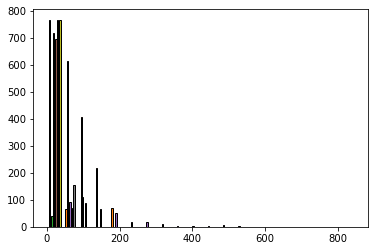

In [602]:
import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create histogram to visualize values in dataset
plt.hist(df, edgecolor='black', bins=20)

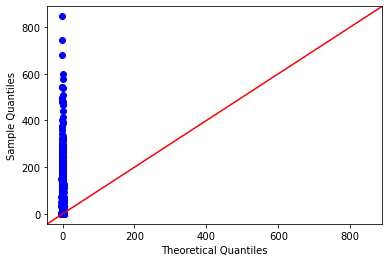

In [603]:
import math
import numpy as np
from scipy.stats import lognorm
import statsmodels.api as sm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df, line='45')

plt.show()

In [604]:
import math
import numpy as np
from scipy.stats import shapiro 
from scipy.stats import lognorm

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#perform Shapiro-Wilk test for normality
for i in df.columns:
    stat, p = shapiro(df[i])
    if p > 0.05:
        print("Parametric")
    else:
        print("Non Parametric")

Non Parametric
Non Parametric
Non Parametric
Non Parametric
Non Parametric
Non Parametric
Non Parametric
Non Parametric
Non Parametric


we will reject the null hypothesis if p < 0.05. So, as per the test we can say that the it is not following the nonrmal distribution.

Now, all the test for the non-parametric data: 
    
Mann-whitney Test

Kruskal wallis Test

Nemenyi Test 

# 4.1 Comparing two samples 

# Mann-whitney test

A Mann-Whitney test is used to compare the differences between two independent samples when the sample distributions are not normally distributed.

H0 : mean is same

H1 : mean is different

if p-value < alpha then reject H0

In [605]:
import scipy.stats as stats

for i in df.columns:
    stat, p = stats.mannwhitneyu(df[i], df['Outcome']) 
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05 
    if p > alpha:
        print(f'Same distribution ({i}) (fail to reject H0)\n')
    else:
        print(f'Different distribution ({i}) (reject H0)\n')

Statistics=514236.000, p=0.000
Different distribution (Pregnancies) (reject H0)

Statistics=587234.000, p=0.000
Different distribution (Glucose) (reject H0)

Statistics=571694.000, p=0.000
Different distribution (BloodPressure) (reject H0)

Statistics=472238.000, p=0.000
Different distribution (SkinThickness) (reject H0)

Statistics=396092.000, p=0.000
Different distribution (Insulin) (reject H0)

Statistics=584126.000, p=0.000
Different distribution (BMI) (reject H0)

Statistics=397668.000, p=0.000
Different distribution (DiabetesPedigreeFunction) (reject H0)

Statistics=589824.000, p=0.000
Different distribution (Age) (reject H0)

Statistics=294912.000, p=1.000
Same distribution (Outcome) (fail to reject H0)



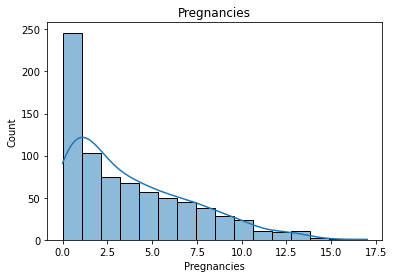

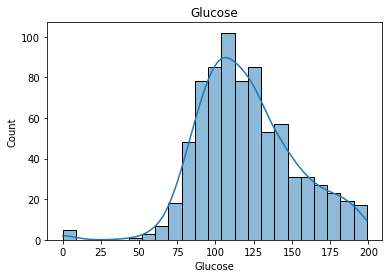

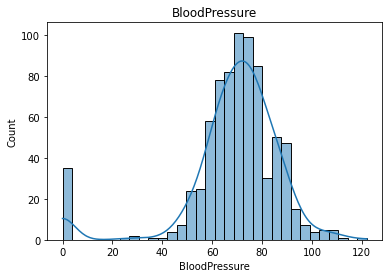

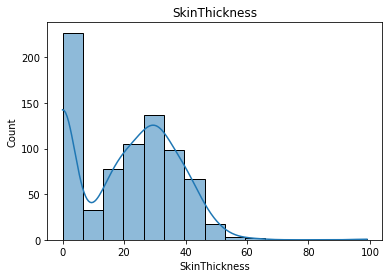

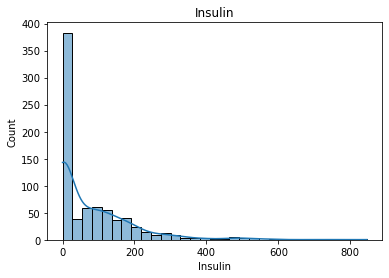

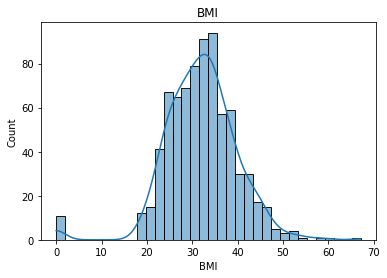

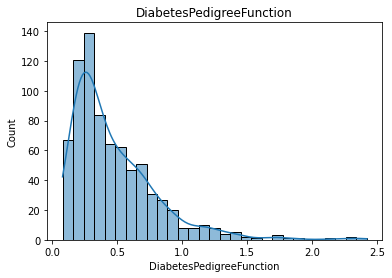

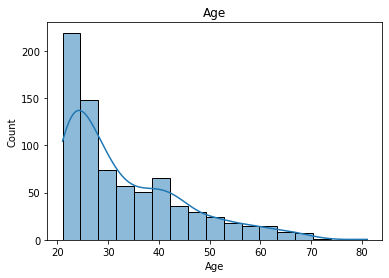

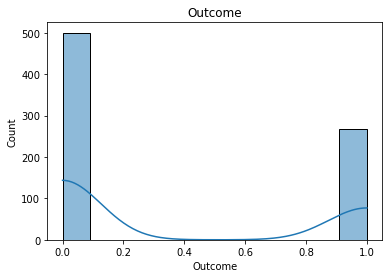

In [606]:
## Visualization
for i in df.columns:
    sns.histplot(df[i], kde=True)
    plt.title(i)
    plt.show()

# 4.2 The Analysis of variance 

# K-W TEST (One-way anova)

A Kruskal-Wallis test is used to determine whether or not there is a statistically significant difference between the medians of three or more independent groups.

This test is the nonparametric equivalent of the one-way ANOVA.

H0 : mean is same

H1 : mean is different

if p-value < alpha then reject H0

In [607]:
#K-W TEST
import scipy.stats as stats
stat, p = stats.kruskal(df['Pregnancies'],df['Glucose'],df['BloodPressure'],df['SkinThickness'],df['Insulin'],df['BMI'],df['Age'],df['DiabetesPedigreeFunction'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05 
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')


Statistics=3515.420, p=0.000
Different distributions (reject H0)


We have adequate information to conclude that the mean values across each group are not identical because we can see that the total p-value from the ANOVA table is not significant, i.e., less than.05.

This does not, however, indicate which groups differ from one another. It merely informs us that not all group ways are created equal. We need to run a post hoc test to determine precisely which groups differ from one another. Nemenyi's Test can be used to identify precisely which group means are altered as a result.

# Nemenyi Test 

H0 : mean is same

H1 : mean is different

if p-value < alpha then reject H0

In [608]:
import scikit_posthocs as sp
sp.posthoc_nemenyi_friedman(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
Glucose,0.001,1.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001
BloodPressure,0.001,0.001,1.000,0.001,0.001,0.001,0.001,0.001,0.001
SkinThickness,0.001,0.001,0.001,1.000,0.001,0.001,0.001,0.001,0.001
Insulin,0.001,0.001,0.001,0.001,1.000,0.001,0.001,0.001,0.001
BMI,0.001,0.001,0.001,0.001,0.001,1.000,0.001,0.900,0.001
DiabetesPedigreeFunction,0.001,0.001,0.001,0.001,0.001,0.001,1.000,0.001,0.001
Age,0.001,0.001,0.001,0.001,0.001,0.900,0.001,1.000,0.001
Outcome,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,1.000


Since all the p values < alpha: therefore reject the Null Hypothesis

There is difference in the mean of the groups.

# 4.3 The Analysis of Categorical Data 

# Chi-Square test 

The Chi-square test of independence examines the likelihood of a relationship between two variables. For two nominal or category variables, we have counts. Additionally, we believe there is no connection between the two variables. We can determine whether or not our proposal is plausible using the test.
    
H0 : The variables are independent 

H1 : The variables are dependent

In [609]:
from scipy.stats import chi2_contingency

# defining the table
data = [df['Age'], df['Outcome']]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))

if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (H0 holds true)')


p value is 1.0
Independent (H0 holds true)


This test is conducted between two columns and I checked for other columns too and I get the result independent for all the test.

By looking at the result of all the test we can finally say that all the columns are independent from each other and it is following the different distributions for all of that.

# 4.4 Logistic Regression 

In [698]:
x, y = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','DiabetesPedigreeFunction','Insulin','BMI']], df['Outcome']

In [699]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0,test_size= 0.2)

In [700]:
print ( X_train.shape, Y_train.shape)
print ( X_test.shape, Y_test.shape)

(614, 7) (614,)
(154, 7) (154,)


In [701]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
score_test_ = accuracy_score(Y_test,Y_predict)
print(classification_report(Y_test,Y_predict))
score_test_

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



0.8116883116883117

By looking at the accuracy of the logistic regression model we can say that this model is good but we have to improve accuracy of the model by applying best features in the model.

In [696]:

x, y = df[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']], df['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0,test_size= 0.2)

print ( X_train.shape, Y_train.shape)
print ( X_test.shape, Y_test.shape)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
score_test_ = accuracy_score(Y_test,Y_predict)
print(classification_report(Y_test,Y_predict))
score_test_

(614, 5) (614,)
(154, 5) (154,)
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       107
           1       0.73      0.57      0.64        47

    accuracy                           0.81       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.80      0.81      0.80       154



0.8051948051948052

I tried to implement logistic regression model using forward selection best features but it seems that the accuracy is almost similar

In [697]:

x, y = df[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']], df['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0,test_size= 0.2)

print ( X_train.shape, Y_train.shape)
print ( X_test.shape, Y_test.shape)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
score_test_ = accuracy_score(Y_test,Y_predict)
print(classification_report(Y_test,Y_predict))
score_test_

(614, 5) (614,)
(154, 5) (154,)
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       107
           1       0.75      0.64      0.69        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



0.8246753246753247

Then I implemented same for backward selection best features and accuracy got improved and I say that this model is performing better.

## 4.5 Resampling Methods 

### k-fold cross validation 

The dataset is split into ‘k’ number of subsets, k-1 subsets then are used to train the model and the last subset is kept as a validation set to test the model. Then the score of the model on each fold is averaged to evaluate the performance of the model.

In [615]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
#Loading the dataset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
 
#Implementing cross validation
 
k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.7012987012987013, 0.8181818181818182, 0.7402597402597403, 0.7142857142857143, 0.7792207792207793, 0.7532467532467533, 0.8571428571428571, 0.8051948051948052, 0.7236842105263158, 0.8026315789473685]
Avg accuracy : 0.7695146958304854


In the code above we implemented 10 fold cross-validation.

sklearn.model_selection module provides us with KFold class which makes it easier to implement cross-validation. KFold class has split method which requires a dataset to perform cross-validation on as an input argument.

We performed a binary classification using Logistic regression as our model and cross-validated it using 5-Fold cross-validation. The average accuracy of our model was approximately 76.95%

## Bootstrapping 

In [617]:
train_score = []
test_score = []
n_times = 10

## Performing bootstrapping
for i in range(n_times):
    X = df.drop('Outcome',axis=1)
    y = df['Outcome']
    
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42+i)
    
    #choose from different tunable hyper parameters
    clf = LogisticRegression().fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    # Storing accuracy values
    train_score.append(mae(y_train, clf.predict(x_train)))
    test_score.append(mae(y_test, clf.predict(x_test)))

################################################
# Result of all bootstrapping trials
print("Mean Training MSE = ", np.mean(train_score)*100)
print("Mean Testing MAE = ", np.mean(test_score)*100)

Mean Training MSE =  21.872964169381106
Mean Testing MAE =  23.051948051948052


## 4.6 Logistic Model Selection and Regularization

## Feature Selection 

Feature selection is the process of isolating the most consistent, non-redundant, and relevant features to use in model construction. Methodically reducing the size of datasets is important as the size and variety of datasets continue to grow. The main goal of feature selection is to improve the performance of a predictive model and reduce the computational cost of modeling.

# Feature selection using fisher score 

It computes chi-squared stats between each non-negative feature and class.

This score can be used to evaluate categorical variables in a classification task. It compares the observed 
distribution of the different classes of target Y among the different categories of the feature, against the expected 
distribution of the target classes, regardless of the feature categories. We will use this to select the 6 best features 
based on Fisher score.

In [619]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


X = df.drop('Outcome',axis=1)
X = pd.DataFrame(X)
Y = df['Outcome']

for i in range(1,8):
    select_clf = SelectKBest(score_func=f_classif, k=i)
    select_clf.fit(X, Y)
    new_X = X.iloc[:,select_clf.get_support()]
    
    x_train, x_test, y_train, y_test = train_test_split(new_X, df['Outcome'], test_size=0.2, random_state=1)
    
    log_reg = sm.OLS(y_train.values.ravel(), x_train).fit()
    
    clf = LogisticRegression().fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print("Number of Paramters : {}".format(i))
    print(X.columns[i])
    print("AIC Score: {}".format(log_reg.aic))
    print("MSE =", mse(y_pred, y_test))
    print("MAE =", mae(y_pred, y_test))
    

    print("****************************************")
    print("")



Number of Paramters : 1
Glucose
AIC Score: 732.1987193635752
MSE = 0.24025974025974026
MAE = 0.24025974025974026
****************************************

Number of Paramters : 2
BloodPressure
AIC Score: 732.5557193129711
MSE = 0.22727272727272727
MAE = 0.22727272727272727
****************************************

Number of Paramters : 3
SkinThickness
AIC Score: 734.426637218937
MSE = 0.21428571428571427
MAE = 0.21428571428571427
****************************************

Number of Paramters : 4
Insulin
AIC Score: 722.5870051773927
MSE = 0.22727272727272727
MAE = 0.22727272727272727
****************************************

Number of Paramters : 5
BMI
AIC Score: 722.4894036118806
MSE = 0.23376623376623376
MAE = 0.23376623376623376
****************************************

Number of Paramters : 6
DiabetesPedigreeFunction
AIC Score: 724.0178292510727
MSE = 0.24025974025974026
MAE = 0.24025974025974026
****************************************

Number of Paramters : 7
Age
AIC Score: 724.588

In [620]:
select_clf = SelectKBest(score_func=f_classif, k=2)
select_clf.fit(x_train, y_train)

SelectKBest(k=2)

In [621]:
X = X.drop("Age", axis = 1)
X.columns.shape

(7,)

In [622]:
select_clf.get_support()

array([False,  True, False, False,  True, False, False])

In [623]:
kept_features = pd.DataFrame({'Columns': X.columns,
                              'Kept': select_clf.get_support()})
kept_features

,Columns,Kept
0,Pregnancies,False
1,Glucose,True
2,BloodPressure,False
3,SkinThickness,False
4,Insulin,True
5,BMI,False
6,DiabetesPedigreeFunction,False


So, this columns are selected as a best features among all the columns.

In [624]:
X = X.iloc[:, select_clf.get_support()]
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
log_reg_kbest = sm.OLS(y_train.values.ravel(), x_train).fit()

print("AIC Score is")
log_reg_kbest.aic


AIC Score is


733.4679482665865

In [625]:
from sklearn.model_selection import cross_validate

lg_resultant = cross_validate(LinearRegression(n_jobs=-1), 
                              x_train, 
                              y_train, 
                              cv=5,
                              return_train_score=True)

print("Mean Training Score = ", lg_resultant['train_score'].mean()*100)
print("Mean Testing Score = ", lg_resultant['test_score'].mean()*100)

Mean Training Score =  23.029765730573143
Mean Testing Score =  21.6443163247276


## Forward Selection

Step forward feature selection starts with the evaluation of each individual feature, and selects that which results in the best performing selected algorithm model. What's the "best?" That depends entirely on the defined evaluation criteria (AUC, prediction accuracy, RMSE, etc.). Next, all possible combinations of the that selected feature and a subsequent feature are evaluated, and a second feature is selected, and so on, until the required predefined number of features is selected.

We will use a Random Forest classifier for feature selection and model building.

In [626]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [627]:
url = "https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset"
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
dataframe = pd.read_csv(url, names=names)

In [628]:
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [629]:
import mlxtend
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Read data
df = pd.read_csv(r'D:\MA541_project\diabetes.csv')

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df.values[:,:-1],
    df.values[:,-1:],
    test_size=0.25,
    random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (576, 8) (576,)
Testing dataset shape: (192, 8) (192,)


In [630]:
# Build RF classifier to use in feature selection
logReg = LogisticRegression()

# Build step forward feature selection
sfs1 = sfs(logReg,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(df.drop(labels=[df.columns[-1]], axis=1), df[df.columns[-1]])
print(sfs1.k_feature_names_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s finished

[2022-12-15 19:45:39] Features: 1/5 -- score: 0.7474747474747474[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s finished

[2022-12-15 19:45:39] Features: 2/5 -- score: 0.7591206179441474[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s finished

[2022-12-15 19:45:40] Features: 3/5 -- score: 0.7683048977166624[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

('Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age')


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s finished

[2022-12-15 19:45:41] Features: 5/5 -- score: 0.7708768355827178

In [631]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 4, 5, 7]


These are the best features that forward elimination selected for us :
'Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'

We can also see that for the training and testing dataset accurace is improved a lot for the best features.

## Backward Selection 

Step backward feature selection is closely related to forward selection, and it starts with the entire set of features and works backward from there, removing features to find the optimal subset of a predefined size.

In [708]:
# Build RF classifier to use in feature selection
logReg = LogisticRegression()

# Build step forward feature selection
sfs2 = sfs(logReg,
           k_features=5,
           forward=False,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs2 = sfs2.fit(df.drop(labels=[df.columns[-1]], axis=1), df[df.columns[-1]])
print(sfs2.k_feature_names_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.4s finished

[2022-12-15 20:45:44] Features: 7/5 -- score: 0.7747729394788218[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.0s finished

[2022-12-15 20:45:45] Features: 6/5 -- score: 0.7747729394788218[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


('Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction')


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s finished

[2022-12-15 20:45:46] Features: 5/5 -- score: 0.7708683473389355

In [711]:
# Which features?
feat_cols2 = list(sfs2.k_feature_idx_)
print(feat_cols2)
print(sfs2.k_feature_names_)

[1, 2, 4, 5, 6]
('Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction')


These are the best features that forward elimination selected for us :
'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Insulin'

We can see that out of the 5 we get the 4 similar columns in the both the selections.

Now, let's check the accuracy for this selection.

### AIC of regression model 

In the model 1 I used the features which I got in forward selection and in the model 2 I used the features which I got in backward selection.

In [671]:
y = df['Outcome']

#define predictor variables
x = df[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model1 = sm.OLS(y, x).fit()

#view AIC of model
print(model1.aic)

795.2988698277254


In [673]:
y = df['Outcome']

#define predictor variables
x = df[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model2 = sm.OLS(y, x).fit()

#view AIC of model
print(model2.aic)

810.6856583623057


Since the First model has a lower AIC value, it is the better fitting model.

Once we’ve identified this model as the best, we can proceed to fit the model and analyze the results including the R-squared value and the beta coefficients to determine the exact relationship between the set of predictor variables and the response variable.

### BIC of regression model 

In the model 1 I used the features which I got in forward selection and in the model 2 I used the features which I got in backward selection.

In [672]:
y = df['Outcome']

#define predictor variables
x = df[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model1 = sm.OLS(y, x).fit()

#view AIC of model
print(model1.bic)

823.1616082266114


In [674]:
y = df['Outcome']

#define predictor variables
x = df[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model2 = sm.OLS(y, x).fit()

#view AIC of model
print(model2.bic)

838.5483967611917


Since the first model has a lower BIC value, it is the better fitting model. 

For the both AIC and BIC model 1 qualifies as better compare to model 2.

### Training and Testing set perfomance using random forest classifier

In [676]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
pred_random = clf.predict(X_test)
pred_random2 = clf.predict(X_train)

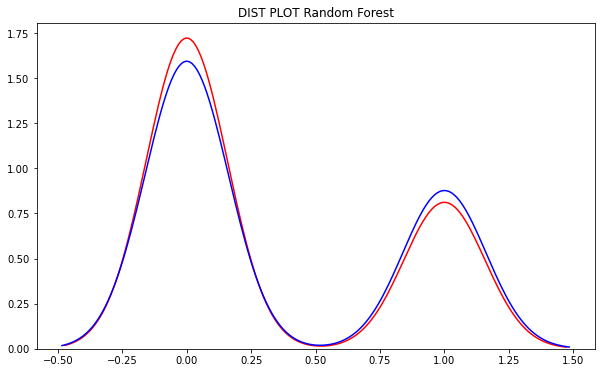

In [677]:
# for plotting graph of test
plt.figure(figsize=(10, 6))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred_random, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('DIST PLOT Random Forest')
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.close()

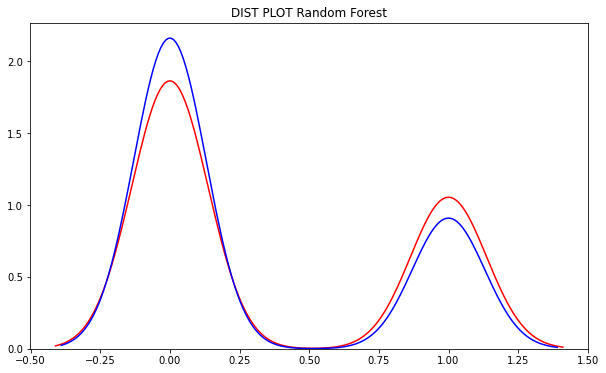

In [678]:
# for plotting graph of train
plt.figure(figsize=(10, 6))
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(pred_random2, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('DIST PLOT Random Forest')
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.close()

## LassoCV

In [643]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

We’ll use Outcome as the response variable and the following variables as the predictors

In [679]:
data = df[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']]

#view first ten rows of data
data[0:10]

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,6,148,0,33.6,50,1
1,1,85,0,26.6,31,0
2,8,183,0,23.3,32,1
3,1,89,94,28.1,21,0
4,0,137,168,43.1,33,1
5,5,116,0,25.6,30,0
6,3,78,88,31.0,26,1
7,10,115,0,35.3,29,0
8,2,197,543,30.5,53,1
9,8,125,0,0.0,54,1


In [680]:
#Next, we’ll use the LassoCV() function from sklearn to fit the lasso regression model and we’ll use the RepeatedKFold() function to perform k-fold cross-validation to find the optimal alpha value to use for the penalty term.

#define predictor and response variables
X = data[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']]
y = data["Outcome"]

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
model.fit(X, y)

#display lambda that produced the lowest test MSE
print(model.alpha_)


0.0


Lastly, we can use the final lasso regression model to make predictions on new observations. For example, the following code shows how to define a Outcome with the following attributes:

Pregnancies : 11, 

Glucose : 134, 

Insulin : 143

BMI : 30.9

Age : 25

In [681]:
new = [11, 134, 143, 30.9, 25]

#predict hp value using lasso regression model
model.predict([new])

array([0.52815325])

Based on the input values, the model predicts this person to have a chances of diabetes is 0.52815325

### PCA 

Principal Component Analysis is basically a statistical procedure to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. 
Each of the principal components is chosen in such a way so that it would describe most of them still available variance and all these principal components are orthogonal to each other. In all principal components first principal component has a maximum variance.

In [719]:
x, y = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','DiabetesPedigreeFunction','Insulin','BMI']], df['Outcome']

# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [720]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [721]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [722]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)


In [723]:
# making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


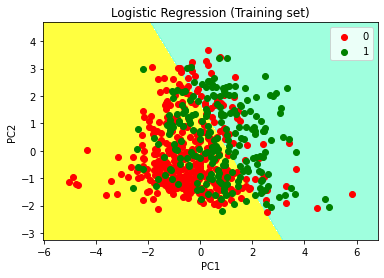

In [724]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()


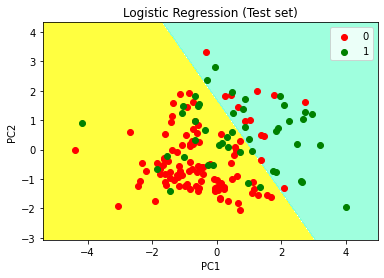

In [725]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()


# 4.7 Moving Beyond Linearity

## Polynomial Regression 

In [726]:
from sklearn.preprocessing import PolynomialFeatures
  
for i in range(2,5):  
    X = df.drop(['Outcome'],axis=1)
    y = df['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

    poly = PolynomialFeatures(degree = i)
    X_train = poly.fit_transform(X_train)
    X_test = poly.fit_transform(X_test)


    poly.fit(X_train, y_train)
    logReg = LogisticRegression()
    logReg.fit(X_train, y_train)

    y_pred = logReg.predict(X_test)
    print("for degree : {}".format(i))
    print("MAE : ", mae(y_test, y_pred))
    print(" *****************************")


for degree : 2
MAE :  0.3246753246753247
 *****************************
for degree : 3
MAE :  0.3203463203463203
 *****************************
for degree : 4
MAE :  0.354978354978355
 *****************************


## Regression Splines

<AxesSubplot:>

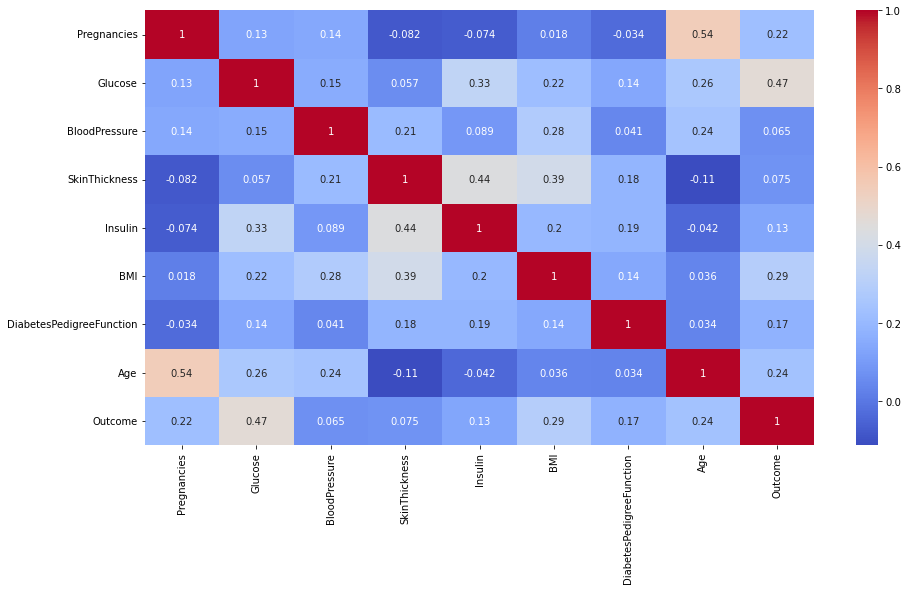

In [728]:
plt.figure(figsize=(15,8))
ans = df.corr()
sns.heatmap(ans,annot=True,cmap="coolwarm")

Pregnancies and Age are highly correlated so we can use them to make such prediction 

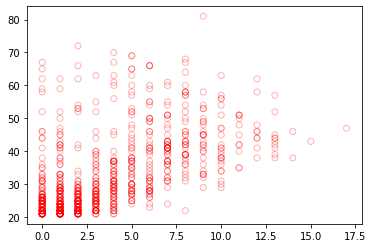

In [729]:
x = data['Pregnancies'].values.reshape(-1,1)
y = data['Age'].values.reshape(-1,1)
plt.scatter(x, y, facecolor='None', edgecolor='r', alpha=0.3)
plt.show()


In [730]:
pre_process = PolynomialFeatures(degree=3)
X_poly = pre_process.fit_transform(x)

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)


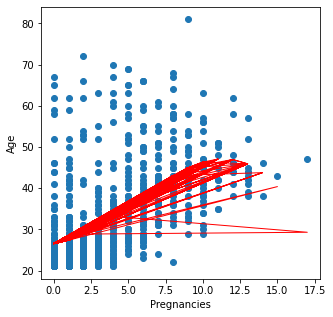

In [731]:
# Plot our model on our data
plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=1)
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.show()

In [732]:
print(' residual sum of squares(RSS) is : '+ str(sum((y_pred - y)**2)))
r2_score(y, y_pred)

## since r2 is very low: so one variable is not enough for the same!

 residual sum of squares(RSS) is : [72554.94480207]


0.31602550525254325

RSS is very low so we can say that one or two variable is not good enough to make the predictions.

Now, let's plot this for more than one degree

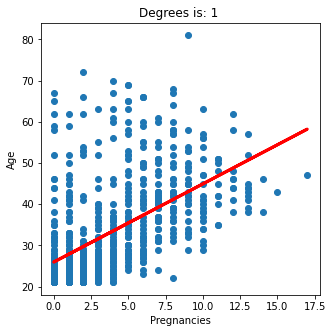

df = 1, RSS = [74646.61344268], R^2 = 0.29630737293856724


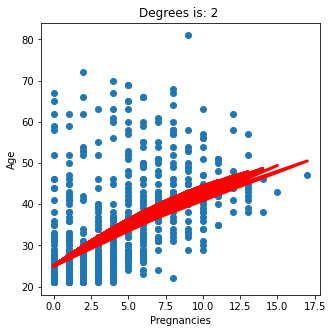

df = 2, RSS = [74113.94599556], R^2 = 0.3013288218419564


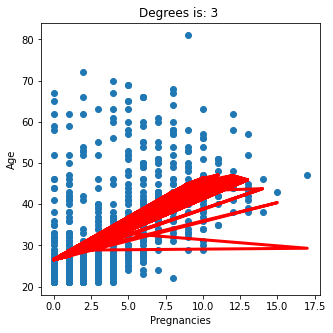

df = 3, RSS = [72554.94480207], R^2 = 0.31602550525254325


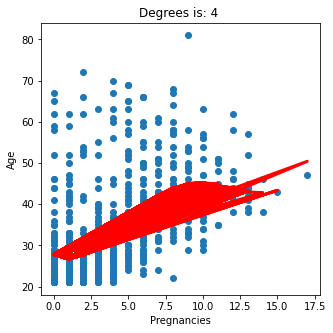

df = 4, RSS = [71221.39732885], R^2 = 0.32859683945597595


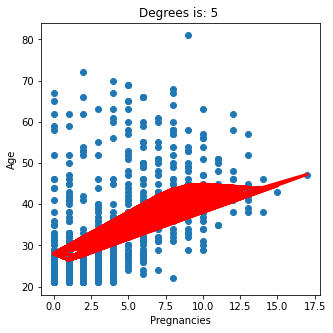

df = 5, RSS = [71159.71016405], R^2 = 0.3291783635338945


In [733]:
for i in range(1, 6):  ## degrees from 1 to 5
    pre_process = PolynomialFeatures(degree=i)
    X_poly = pre_process.fit_transform(x)
    pr_model = LinearRegression().fit(X_poly, y)
    y_pred = pr_model.predict(X_poly)
    rss = sum((y_pred - y)**2)
    r2 = r2_score(y, y_pred)
    
    plt.figure(figsize=(5,5))
    plt.scatter(x, y)
    plt.plot(x, y_pred, color='red', linewidth=3)
    plt.xlabel('Pregnancies')
    plt.ylabel('Age')
    plt.title("Degrees is: {} ".format(i))
    plt.show()
    
    
    print("df = {}, RSS = {}, R^2 = {}".format(i, rss, r2))

We can see that the RSS is improving as we increased the degree but we can see that it improved just like 1% so still its not good to make the prediction.

Now, I will try to perform cross validation to get the optimal degree

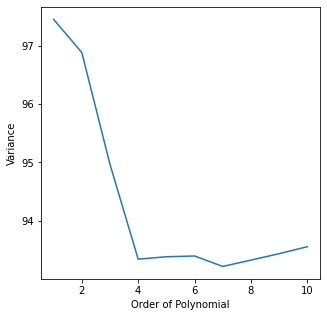

In [734]:
variance = []
ofp = []

X,Y = x,y
for degree in range(1, 11):
    pre_process = PolynomialFeatures(degree=degree)
    X_poly = pre_process.fit_transform(X)
    reg_model = LinearRegression().fit(X_poly, Y)
    y_pred = reg_model.predict(X_poly)
    rss = sum((y_pred - Y)**2)
    
    var = rss/(len(X)-degree-1)
    
    ofp.append(degree)
    variance.append(var)
    
plt.figure(figsize=(5,5))
plt.plot(ofp, variance)
plt.xlabel('Order of Polynomial')
plt.ylabel('Variance')
plt.show()

# GAM

GAM is an additive modeling technique where the impact of the predictive variables is captured through smooth functions which—depending on the underlying patterns in the data—can be nonlinear:

there are at least three good reasons why you want to use GAM: interpretability, flexibility/automation, and regularization. Hence, when your model contains nonlinear effects, GAM provides a regularized and interpretable solution – while other methods generally lack at least one of these three features. In other words, GAMs strike a nice balance between the interpretable, yet biased, linear model, and the extremely flexible, “black box” learning algorithms.

In [682]:
import pandas as pd        
from pygam import LogisticGAM

# #keep best 5 features of forward selection 
X = df[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']]
y = df["Outcome"]
gam = LogisticGAM().fit(X, y)

In [683]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      36.725
Link Function:                        LogitLink Log Likelihood:                                  -320.5606
Number of Samples:                          768 AIC:                                              714.5711
                                                AICc:                                             718.5775
                                                UBRE:                                               2.9687
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3547
Feature Function                  Lam

In [684]:
gam.accuracy(X, y)

0.7903645833333334

In [685]:
import pandas as pd        
from pygam import LogisticGAM

# #keep best 5 features of backward selection 
X = df[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']]
y = df["Outcome"]
gam2 = LogisticGAM().fit(X, y)

In [686]:
gam2.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     34.9449
Link Function:                        LogitLink Log Likelihood:                                  -336.4938
Number of Samples:                          768 AIC:                                              742.8774
                                                AICc:                                             746.5104
                                                UBRE:                                               3.0037
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3226
Feature Function                  Lam

In [687]:
gam2.accuracy(X, y)

0.7864583333333334

I implemented two GAM models and in the each model I used forward selection best features and backward selection best features. After using GAM model I get the accuaracy better in model 1 compared to model 2.

After using best features on the all models I can say that the Logistic Regression model is outperforming every other model in both best features.

# Conclusion 

We have successfully used statistical methods for the analysis of our data. We used non-parametric tests to 
identify the relation (check if their means are the same) between the numeric input columns. Then we did categorical data analysis using the chi squared test of independence to test the relation between input categorical variables and output categorical variables. Then to fit the logistic regression model, we used some techniques to reduce the features and select the best features accordingly. Then we fitted the logistic regression model to predict the Outcome. The fit of the model was tested on the training and test set, and we managed to get an accuracy of 82.46%.

# References 

1. dataset : https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
2. One-way anova : https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/
3. AIC and BIC : https://www.statology.org/aic-in-python/
4. Chi-square test : https://www.geeksforgeeks.org/chi-square-test-in-r/
5. Feature Selection : https://www.kdnuggets.com/2018/06/step-forward-feature-selection-python.html
6. PCA : https://www.geeksforgeeks.org/principal-component-analysis-with-python/
7. Lasso : https://www.statology.org/lasso-regression-in-python/